In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.0+cu110 True


In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from cv2 import imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

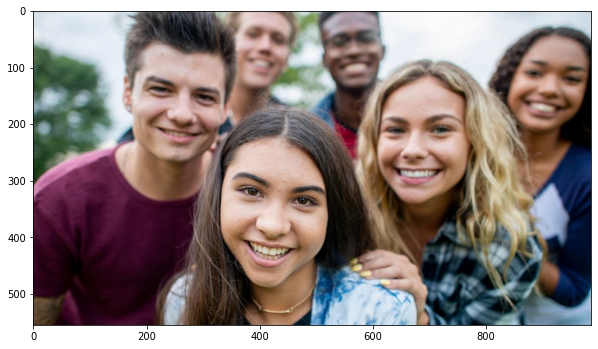

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

!wget https://static-37.sinclairstoryline.com/resources/media/9c82c7a0-0963-4b57-a4a8-bc4a9cf5d0b0-large16x9_GettyImages1134307248.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)
with torch.no_grad():
    outputs = predictor(im)

/home/rodrigo/.local/lib/python3.8/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


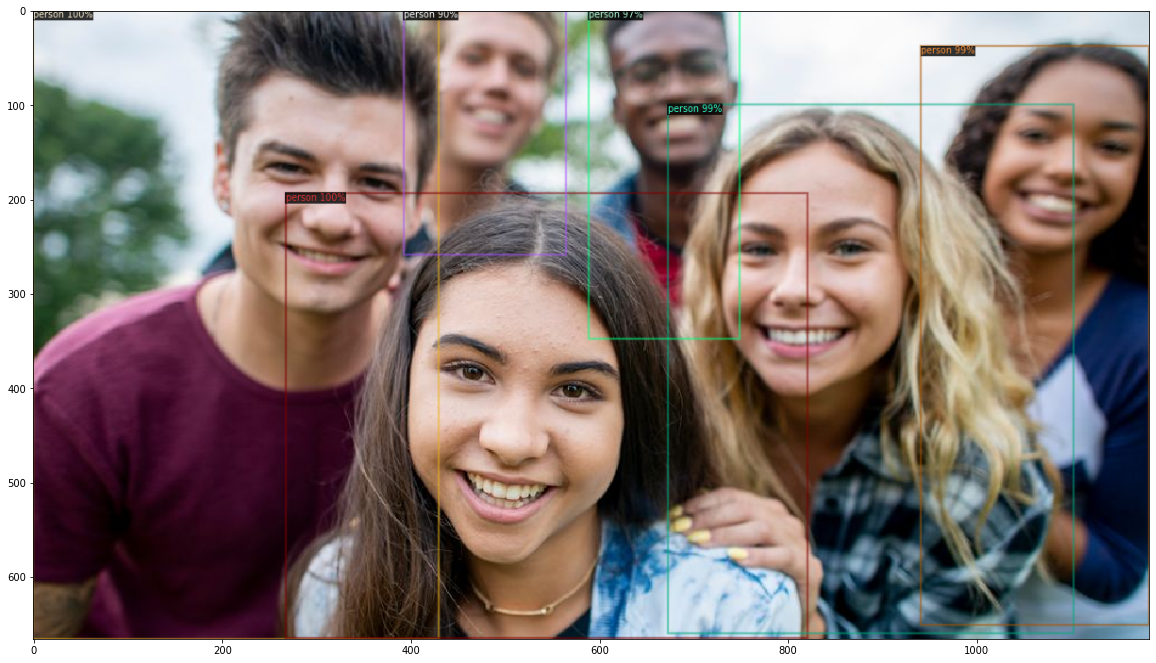

In [6]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
from PIL import Image
from torchvision import models
from torchvision import transforms

input_image = Image.open('input.jpg')
resnet = models.resnet50(pretrained=False)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [8]:
print(input_batch.shape)
with torch.no_grad():
    output = predictor.model.backbone(input_batch.cuda())
print(output['res4'].shape)
print(output['res4'])

torch.Size([1, 3, 224, 224])
torch.Size([1, 1024, 14, 14])
tensor([[[[0.0000e+00, 1.0075e-01, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [3.7601e-02, 7.4694e-01, 2.5662e-01,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.9792e-01, 9.6481e-01, 7.8055e-01,  ..., 5.5727e-01,
           7.0251e-02, 0.0000e+00],
          ...,
          [1.8042e-01, 6.2395e-01, 2.4407e-01,  ..., 9.0524e-01,
           6.6083e-02, 0.0000e+00],
          [1.2366e-01, 6.3609e-01, 3.9119e-02,  ..., 1.6578e-01,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 1.7924e-01, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]],

         [[0.0000e+00, 2.7205e-01, 2.6571e-01,  ..., 3.0023e-02,
           2.8157e-01, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
